In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
### Data generation
data = []
labels = []
epochs = 100
dims = (2,)

for i in range(500):
    if i < 250:
        temp = np.random.uniform(-50,-100,dims)
        if bool(random.getrandbits(1)):
            temp[1] = -temp[1]
    else:
        temp = np.random.uniform(50,100,dims)
        if bool(random.getrandbits(1)):
            temp[1] = -temp[1]
            
    data.append(temp)
    if temp[0] < 0:
        labels.append(0)
    else :
        labels.append(1)

data = np.array(data)
labels = np.array(labels)
# print(data)
# print(labels)

class perceptron():
    def __init__(self,data,labels,epochs,printFlag=False, w=None, b=None):
        self.data = data
        if (w == None and b == None):
            self.w = np.random.uniform(-1,1, data[0].shape)
            self.b = np.random.uniform(-1,1)
            
        else :
            self.w = np.array(w)
            self.b = np.array(b)
        print('Initial random weights')
        print(self.w, self.b)
        self.out = 0
        self.x = 0
        self.t = 0
        self.lab = labels
        self.err_count = 0
        self.epochs = epochs
        self.printFlag = printFlag
    
    def evaluate(self):
        return np.sum(self.w*self.x) + self.b
    
    def update(self):
        if(self.out < 0 and self.t == 1):
            self.w += self.x
            self.b += 1
            self.err_count += 1
            
        elif(self.out > 0 and self.t == 0):
            self.w -= self.x
            self.b -= 1
            self.err_count += 1

    def train(self):
        for j in range(self.epochs):
            for i in range(len(self.data)):
                self.x = self.data[i]
                self.t = self.lab[i]
                self.out = self.evaluate()
                self.update()
            if self.printFlag:
                print(self.err_count)
            if self.err_count == 0:
                print('Optimality reached : All points classified correctly')
                break
            self.err_count = 0
            if j+1 == self.epochs:
                print('Epochs completed. Exiting')
        return self.w, self.b

In [3]:
weights, bias = perceptron(data, labels, epochs).train()
print(weights, bias)

Initial random weights
[ 0.98325242 -0.52056108] -0.6823769540903546
Optimality reached : All points classified correctly
[142.01133411  19.97676191] 1.3176230459096454


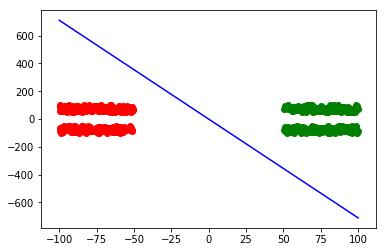

In [4]:
x = np.linspace(-100,100,1000)
y = -(weights[0]*x + bias)/weights[1]
plt.plot(x,y,'b')
plt.scatter(list(data[labels == 0][:,0]), list(data[labels == 0][:,1]), c='r')
plt.scatter(data[labels == 1][:,0], data[labels == 1][:,1], c='g')

### Linearly seperable data

1. AND logic
2. OR logic

### Non-linearly seperable data

1. XOR Logic
2. XNOR Logic

In [5]:
### And logic data

AND_data = []
AND_labels = []
for i in range(100):
    for j,k in zip(np.array([[1,0],[0,1],[1,1],[0,0]]),np.array([0,0,1,0])):
        AND_data.append(j+np.random.uniform(0,1e-1,j.shape))
        AND_labels.append(k)
        
AND_data = np.array(AND_data)
AND_labels = np.array(AND_labels)

# plt.scatter(AND_data[AND_labels == 0][:,0], AND_data[AND_labels == 0][:,1], c='r')
# plt.scatter(AND_data[AND_labels == 1][:,0], AND_data[AND_labels == 1][:,1], c='g')
# plt.title('AND data')
# plt.show()

### OR logic data

OR_data = []
OR_labels = []
for i in range(100):
    for j,k in zip(np.array([[1,0],[0,1],[1,1],[0,0]]),np.array([1,1,1,0])):
        OR_data.append(j+np.random.uniform(0,1e-1,j.shape))
        OR_labels.append(k)
        
OR_labels = np.array(OR_labels)
OR_data = np.array(OR_data)

# plt.scatter(OR_data[OR_labels == 0][:,0], OR_data[OR_labels == 0][:,1], c='r')
# plt.scatter(OR_data[OR_labels == 1][:,0], OR_data[OR_labels == 1][:,1], c='g')
# plt.title('OR data')
# plt.show()

### XOR Data

XOR_data = []
XOR_labels = []
for i in range(100):
    for j,k in zip(np.array([[1,0],[0,1],[1,1],[0,0]]),np.array([1,1,0,0])):
        XOR_data.append(j+np.random.uniform(0,1e-1,j.shape))
        XOR_labels.append(k)
        
XOR_labels = np.array(XOR_labels)
XOR_data = np.array(XOR_data)

# plt.scatter(XOR_data[XOR_labels == 0][:,0], XOR_data[XOR_labels == 0][:,1], c='r')
# plt.scatter(XOR_data[XOR_labels == 1][:,0], XOR_data[XOR_labels == 1][:,1], c='g')
# plt.title('XOR data')
# plt.show()

### XNOR Data

XNOR_data = []
XNOR_labels = []
for i in range(100):
    for j,k in zip(np.array([[1,0],[0,1],[1,1],[0,0]]),np.array([0,0,1,1])):
        XNOR_data.append(j+np.random.uniform(0,1e-1,j.shape))
        XNOR_labels.append(k)
        
XNOR_labels = np.array(XNOR_labels)
XNOR_data = np.array(XNOR_data)

# plt.scatter(XNOR_data[XNOR_labels == 0][:,0], XNOR_data[XNOR_labels == 0][:,1], c='r')
# plt.scatter(XNOR_data[XNOR_labels == 1][:,0], XNOR_data[XNOR_labels == 1][:,1], c='g')
# plt.title('XNOR data')
# plt.show()

Initial random weights
[-0.20191576  0.02408272] -0.9553807293686354
Optimality reached : All points classified correctly
[1.826737   1.04525365] -0.9553807293686354


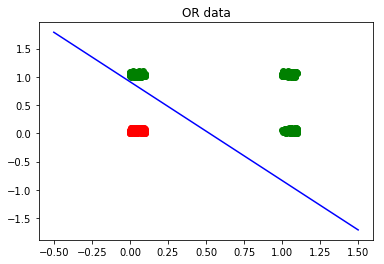

In [6]:
weights_OR, bias_OR = perceptron(OR_data, OR_labels, epochs).train()
print(weights_OR, bias_OR)

x = np.linspace(-0.5,1.5,1000)
y = -(weights_OR[0]*x + bias_OR)/weights_OR[1]
plt.plot(x,y,'b')

plt.scatter(OR_data[OR_labels == 0][:,0], OR_data[OR_labels == 0][:,1], c='r')
plt.scatter(OR_data[OR_labels == 1][:,0], OR_data[OR_labels == 1][:,1], c='g')
plt.title('OR data')
plt.show()

Initial random weights
[-0.71408829  0.12256605] -0.1184480472273457
Optimality reached : All points classified correctly
[1.17171116 2.69929387] -3.1184480472273455


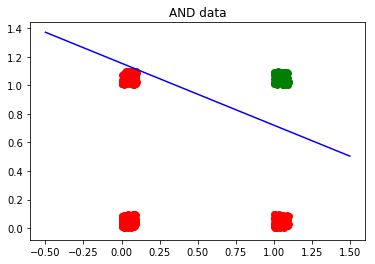

In [7]:
weights_AND, bias_AND = perceptron(AND_data, AND_labels, epochs).train()
print(weights_AND, bias_AND)

x = np.linspace(-0.5,1.5,1000)
y = -(weights_AND[0]*x + bias_AND)/weights_AND[1]
plt.plot(x,y,'b')

plt.scatter(AND_data[AND_labels == 0][:,0], AND_data[AND_labels == 0][:,1], c='r')
plt.scatter(AND_data[AND_labels == 1][:,0], AND_data[AND_labels == 1][:,1], c='g')
plt.title('AND data')
plt.show()

Initial random weights
[0.07954145 0.55842282] -0.12272586486542769
Epochs completed. Exiting
[1.826737   1.04525365] -0.9553807293686354


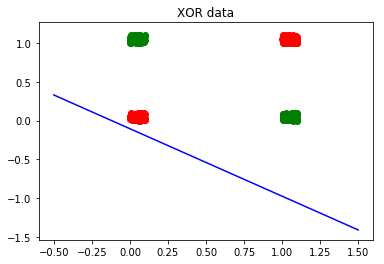

In [8]:
weights_XOR, bias_XOR = perceptron(XOR_data, XOR_labels, epochs).train()
print(weights_OR, bias_OR)

x = np.linspace(-0.5,1.5,1000)
y = -(weights_XOR[0]*x + bias_XOR)/weights_XOR[1]
plt.plot(x,y,'b')

plt.scatter(XOR_data[XOR_labels == 0][:,0], XOR_data[XOR_labels == 0][:,1], c='r')
plt.scatter(XOR_data[XOR_labels == 1][:,0], XOR_data[XOR_labels == 1][:,1], c='g')
plt.title('XOR data')
plt.show()

Initial random weights
[-0.91763081 -0.58193355] 0.14768509593225487
Epochs completed. Exiting
[1.826737   1.04525365] -0.9553807293686354


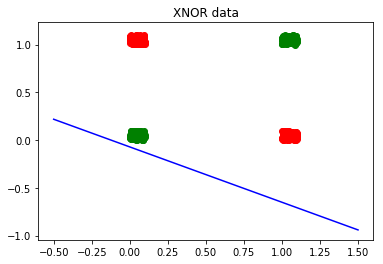

In [9]:
weights_XNOR, bias_XNOR = perceptron(XNOR_data, XNOR_labels, epochs).train()
print(weights_OR, bias_OR)

x = np.linspace(-0.5,1.5,1000)
y = -(weights_XNOR[0]*x + bias_XNOR)/weights_XNOR[1]
plt.plot(x,y,'b')

plt.scatter(XNOR_data[XNOR_labels == 0][:,0], XNOR_data[XNOR_labels == 0][:,1], c='r')
plt.scatter(XNOR_data[XNOR_labels == 1][:,0], XNOR_data[XNOR_labels == 1][:,1], c='g')
plt.title('XNOR data')
plt.show()

From the above 4 plots we can conclude that perceptron is indeed a linear classification/regression unit. Any sort of non-linear classifiable data will not be classified by a single perceptron

### Effects of initialization on the final weights

Initial random weights
[1. 0.] [0.]
Optimality reached : All points classified correctly
[1.92172154 1.804749  ] [-1.]
Initial random weights
[0.39091819 0.31876696] -0.41449039710240476
Optimality reached : All points classified correctly
[0.40338065 1.32669824] -0.41449039710240476


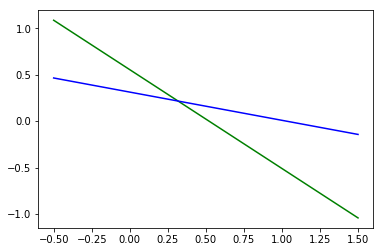

In [23]:
weights_OR, bias_OR = perceptron(OR_data, OR_labels, epochs, w=[1.0,0.0], b=[0.0]).train()
print(weights_OR, bias_OR)
x = np.linspace(-0.5,1.5,1000)
y = -(weights_OR[0]*x + bias_OR)/weights_OR[1]
plt.plot(x,y,'g')

weights_OR, bias_OR = perceptron(OR_data, OR_labels, epochs).train()
print(weights_OR, bias_OR)
x = np.linspace(-0.5,1.5,1000)
y = -(weights_OR[0]*x + bias_OR)/weights_OR[1]

plt.plot(x,y,'b')

As we can see above, the dividing line does change with initialization. This can be explained by stating that there are multiple lines dividing the dataset into its classes and different initializations shall lead to different convergences

### SVM Boundaries

No handles with labels found to put in legend.


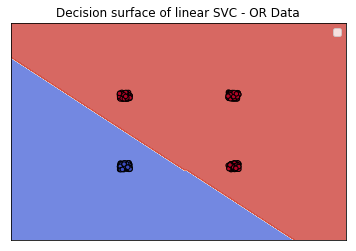

No handles with labels found to put in legend.


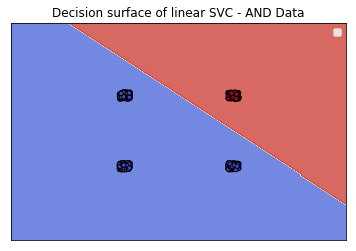

No handles with labels found to put in legend.


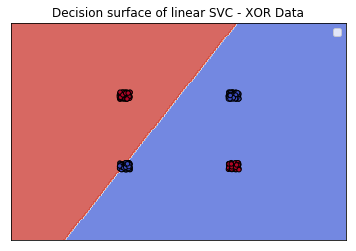

No handles with labels found to put in legend.


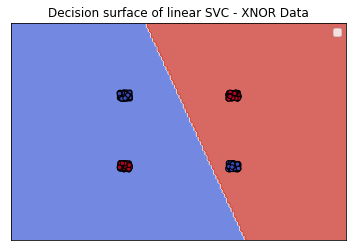

In [26]:
from sklearn.svm import SVC
from sklearn import svm, datasets

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

data_list = [OR_data, AND_data, XOR_data, XNOR_data]
labels_list = [OR_labels, AND_labels, XOR_labels, XNOR_labels]
names = ['OR', 'AND', 'XOR', 'XNOR']


for X,y,name in zip(data_list, labels_list, names):
    model = svm.SVC(kernel='linear')
    clf = model.fit(X, y)

    fig, ax = plt.subplots()
    # title for the plots
    title = ('Decision surface of linear SVC - {} Data'.format(name))
    # Set-up grid for plotting.
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    ax.legend()
    plt.show()

### Comparison between SVM and Perceptron boundaries

We can see that perceptron just tries to classify all the classes and once the stopping criterion is reached, the weights are finalised. As a result, we can have some lines which are barely on the border of one of the class clusters.

But in SVM we have the concept of support vectors and the final boundary lies somewhere in between the support vectors. These support vectors are data dependent so as a result, the final decision boundaries are well far from the data clusters, not necessarily near the clusters

/home/grumptitan/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/grumptitan/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/grumptitan/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/grumptitan/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


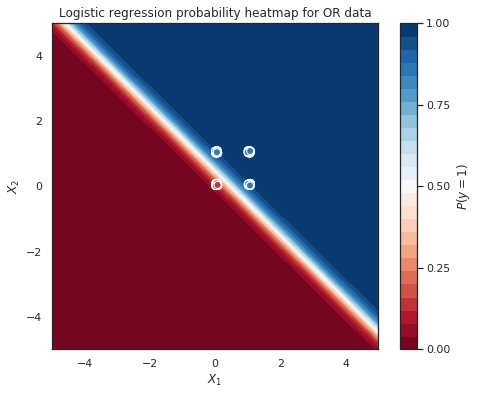

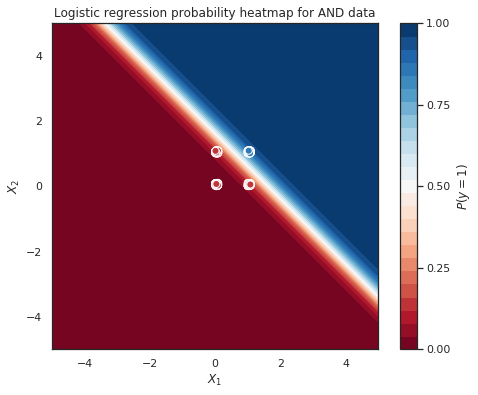

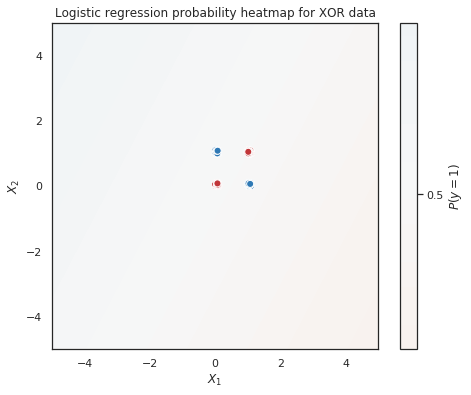

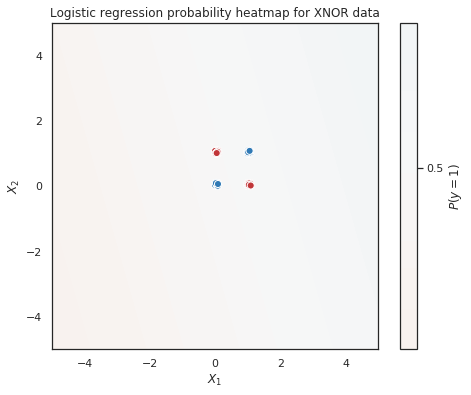

In [30]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set(style="white")

data_list = [OR_data, AND_data, XOR_data, XNOR_data]
labels_list = [OR_labels, AND_labels, XOR_labels, XNOR_labels]
names = ['OR', 'AND', 'XOR', 'XNOR']

for X,y,name in zip(data_list, labels_list, names):
    clf = LogisticRegression().fit(X, y)
    xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
    f, ax = plt.subplots(figsize=(8, 6))
    plt.title('Logistic regression probability heatmap for {} data'.format(name))
    contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                          vmin=0, vmax=1)
    ax_c = f.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, .25, .5, .75, 1])

    ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
               cmap="RdBu", vmin=-.2, vmax=1.2,
               edgecolor="white", linewidth=1)

    ax.set(aspect="equal",
           xlim=(-5, 5), ylim=(-5, 5),
           xlabel="$X_1$", ylabel="$X_2$")

### Logistic regression decision boundaries vs Perceptron

Theory wise perceptrons are pretty close to logistic regressor cells. As a result, the decision boundaries for both perceptron and logistric regressors are pretty close. Since it's a linear classifier with one cell, both fail for the non-linearly seperable data